In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [26]:
canna_data = pd.read_csv("../clean_data.csv")
canna_data
canna_data_df = pd.DataFrame(canna_data)
canna_data_df.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


In [27]:
# Create a list of dictionaries representing each state and its legal status code
state_data = [
    {'State': 'Alabama', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Alaska', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Arizona', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Arkansas', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'California', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Colorado', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Connecticut', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Delaware', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'District of Colombia', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'Florida', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Georgia', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Idaho', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Illinois', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Indiana', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Iowa', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Kansas', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Kentucky', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Louisiana', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Maine', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Maryland', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'Massachusetts', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Michigan', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Minnesota', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Mississippi', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Missouri', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Montana', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Nebraska', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Nevada', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'New Hampshire', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'New Jersey', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'New Mexico', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'New York', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'North Carolina', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'North Dakota', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Ohio', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Oklahoma', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Oregon', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Pennsylvania', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Rhode Island', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'South Carolina', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'South Dakota', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Tennessee', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Texas', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Utah', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Vermont', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'Virginia', 'Legal Status Code': 3, 'Legal Status': 'Decriminalized'},
    {'State': 'Washington', 'Legal Status Code': 4, 'Legal Status': 'Recreational'},
    {'State': 'West Virginia', 'Legal Status Code': 2, 'Legal Status': 'Medicinal'},
    {'State': 'Wisconsin', 'Legal Status Code': 1, 'Legal Status': 'Illegal'},
    {'State': 'Wyoming', 'Legal Status Code': 1, 'Legal Status': 'Illegal'}
]

# Create a dataframe from the list of dictionaries
state_data_df = pd.DataFrame(state_data)

# Print the resulting dataframe
state_data_df.head()


,State,Legal Status Code,Legal Status
0,Alabama,1,Illegal
1,Alaska,4,Recreational
2,Arizona,2,Medicinal
3,Arkansas,2,Medicinal
4,California,4,Recreational


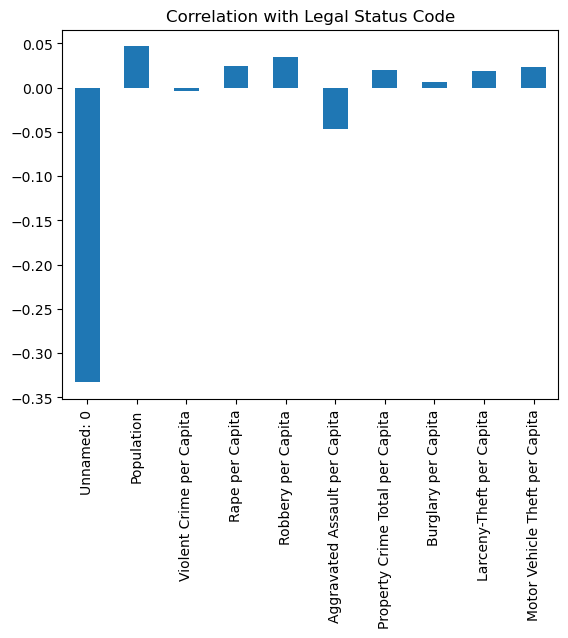

In [28]:
target_col = "Legal Status Code"
sub_df = canna_data_df[[target_col] + [col for col in canna_data_df.columns if col != target_col]]
corr = sub_df.corr()[target_col].drop(target_col)
import matplotlib.pyplot as plt

corr.plot(kind='bar')
plt.title('Correlation with ' + target_col)
plt.show()

In [29]:
#Create a summary table that aggregates all parameters, sums up the population while keeping the status and code by state
sum_pop = canna_data_df['Population'].groupby(canna_data_df['State']).sum()
mean_vcpc= canna_data_df['Violent Crime per Capita'].groupby(canna_data_df['State']).mean()
mean_rapc= canna_data_df['Rape per Capita'].groupby(canna_data_df['State']).mean()
mean_ropc= canna_data_df['Robbery per Capita'].groupby(canna_data_df['State']).mean()
mean_aapc= canna_data_df['Aggravated Assault per Capita'].groupby(canna_data_df['State']).mean()
mean_pctpc= canna_data_df['Property Crime Total per Capita'].groupby(canna_data_df['State']).mean()
mean_bpc= canna_data_df['Burglary per Capita'].groupby(canna_data_df['State']).mean()
mean_ltpc= canna_data_df['Larceny-Theft per Capita'].groupby(canna_data_df['State']).mean()
mean_mvtpc= canna_data_df['Motor Vehicle Theft per Capita'].groupby(canna_data_df['State']).mean()
LegalStatusCode = canna_data_df[["State","Legal Status Code"]].drop_duplicates()


summary_data_df = pd.DataFrame ({
   # "Legal Status Code": LegalStatusCode,
    "Population": sum_pop,
    "Violent Crime per Capita": mean_vcpc,
    "Rape per Capita": mean_rapc,
    "Robbery per Capita": mean_ropc,
    "Aggravated Assault per Capita": mean_aapc,
    "Property Crime Total per Capita": mean_pctpc,
    "Burglary per Capita": mean_bpc,
    "Larceny-Theft per Capita": mean_ltpc,
    "Motor Vehicle Theft per Capita": mean_mvtpc
})

summary_data_df

merged_table_df = pd.merge(summary_data_df,state_data_df, on ="State")
merged_table_df.head()



,State,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita,Legal Status Code,Legal Status
0,Alabama,110808.0,0.004059,0.000418,0.000149,0.003458,0.020720,0.004500,0.014247,0.001974,1,Illegal
1,Alaska,453704.0,0.006540,0.001757,0.000337,0.004382,0.016388,0.002434,0.012237,0.001717,4,Recreational
2,Arizona,5610013.0,0.004097,0.000356,0.000400,0.003300,0.022878,0.003704,0.017204,0.001970,2,Medicinal
3,Arkansas,1737760.0,0.005515,0.000885,0.000286,0.004252,0.022906,0.005243,0.015760,0.001904,2,Medicinal
4,California,32959442.0,0.005242,0.000417,0.001668,0.003120,0.046446,0.009010,0.028470,0.008966,4,Recreational


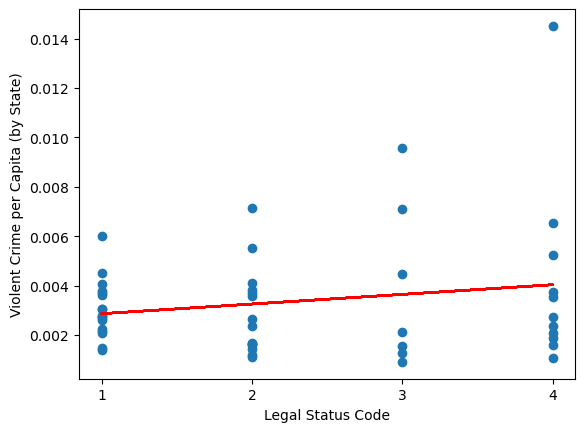

The r-squared is: 0.03421225219748763


In [30]:
x_values = merged_table_df['Legal Status Code']
y_values = merged_table_df['Violent Crime per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Violent Crime per Capita (by State)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

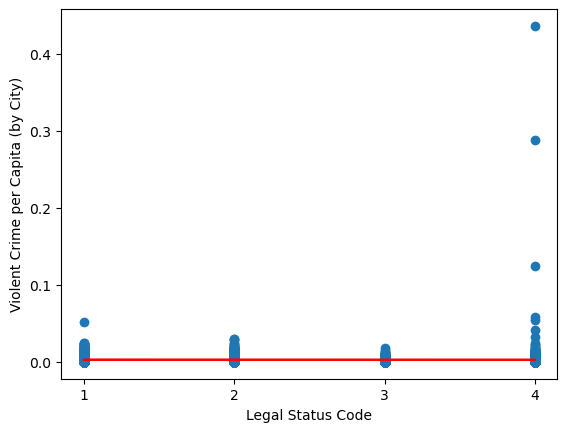

The r-squared is: 1.4658695106368743e-05


In [31]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Violent Crime per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Violent Crime per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

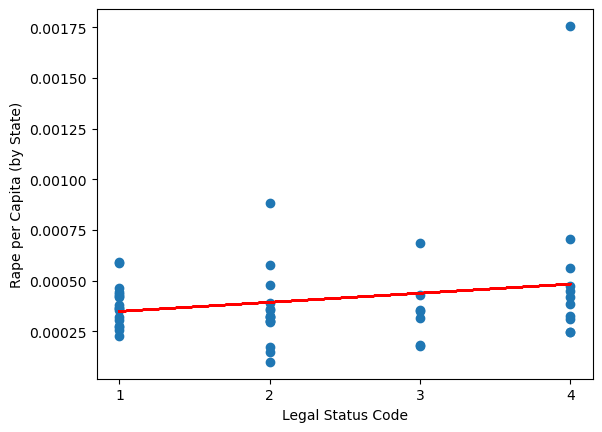

The r-squared is: 0.04477146838721913


In [32]:
x_values = merged_table_df['Legal Status Code']
y_values = merged_table_df['Rape per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Rape per Capita (by State)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

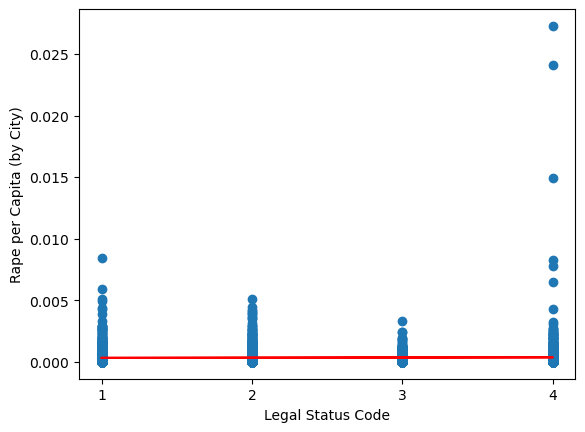

The r-squared is: 0.0006014584154486555


In [33]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Rape per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Rape per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

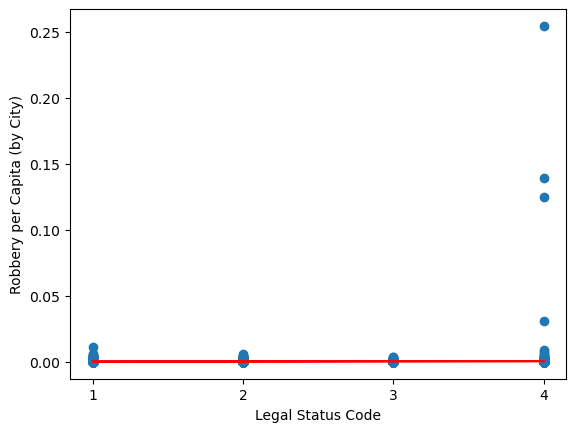

The r-squared is: 0.001221130661575997


In [34]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Robbery per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Robbery per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

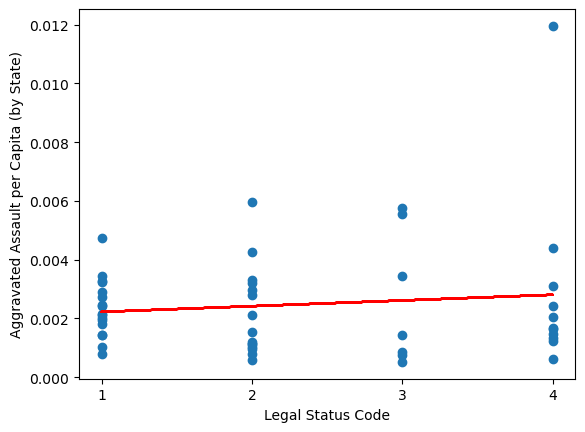

The r-squared is: 0.013319910541696043


In [35]:
x_values = merged_table_df['Legal Status Code']
y_values = merged_table_df['Aggravated Assault per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Aggravated Assault per Capita (by State)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

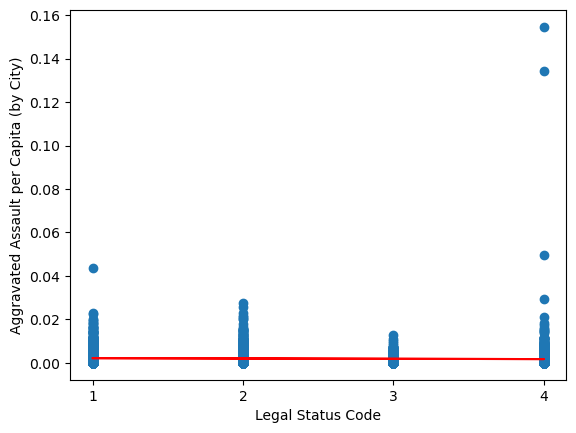

The r-squared is: 0.002177723686627424


In [36]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Aggravated Assault per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Aggravated Assault per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

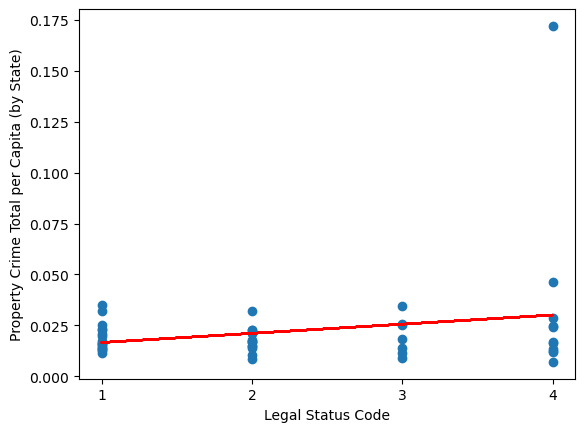

The r-squared is: 0.05108215510232989


In [37]:
x_values = merged_table_df['Legal Status Code']
y_values = merged_table_df['Property Crime Total per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Property Crime Total per Capita (by State)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

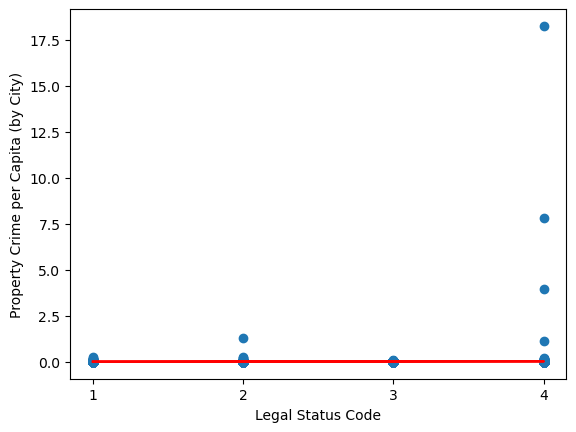

The r-squared is: 0.00041717203707769844


In [38]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Property Crime Total per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Property Crime per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

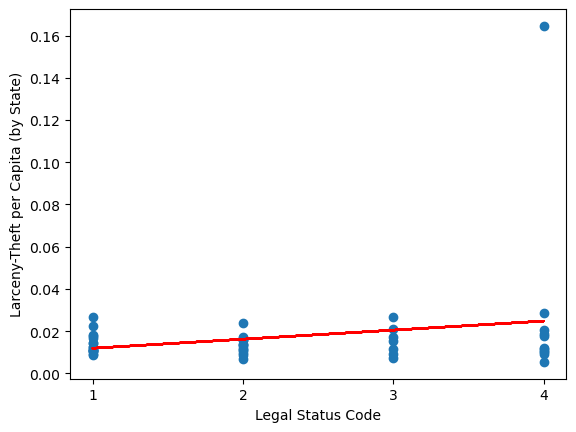

The r-squared is: 0.05097399944146674


In [39]:
x_values = merged_table_df['Legal Status Code']
y_values = merged_table_df['Larceny-Theft per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Larceny-Theft per Capita (by State)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

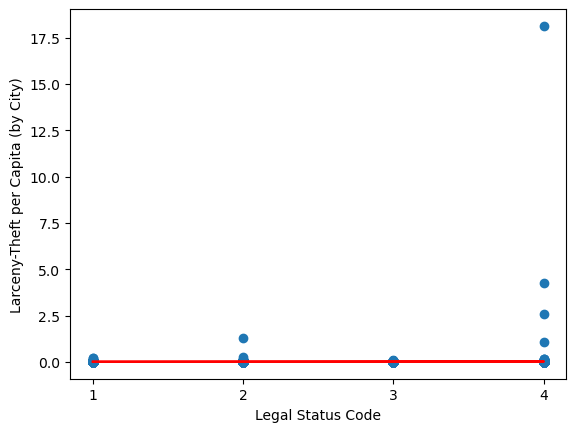

The r-squared is: 0.00035807760453901265


In [40]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Larceny-Theft per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Larceny-Theft per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

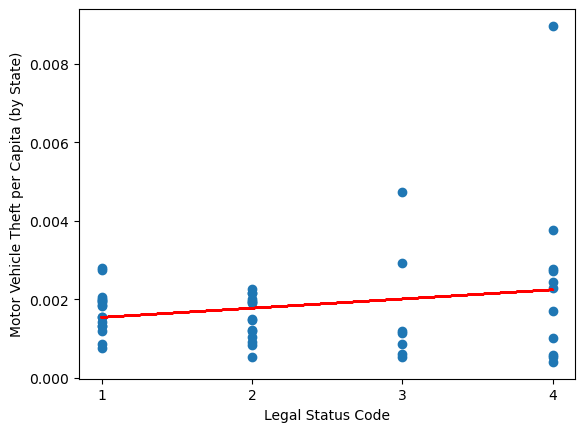

The r-squared is: 0.04047076398736374


In [41]:
x_values = merged_table_df['Legal Status Code']
y_values = merged_table_df['Motor Vehicle Theft per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Motor Vehicle Theft per Capita (by State)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

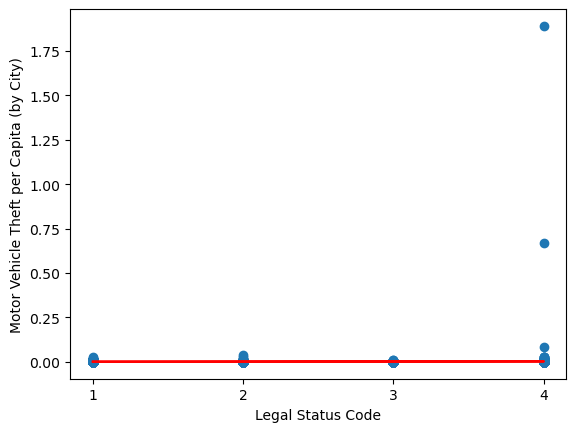

The r-squared is: 0.0005317729608547898


In [42]:
x_values = canna_data['Legal Status Code']
y_values = canna_data['Motor Vehicle Theft per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xticks(np.arange(min(x_values), max(x_values)+1, 1.0))
plt.xlabel('Legal Status Code')
plt.ylabel('Motor Vehicle Theft per Capita (by City)')
plt.show()
print(f"The r-squared is: {rvalue**2}")